<a href="https://colab.research.google.com/github/di-pal-w/machine-learning/blob/main/linear_regression_taxi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/chicago_taxi_train.csv")

In [8]:
df.describe()

,TRIP_START_HOUR,TRIP_SECONDS,TRIP_MILES,TRIP_SPEED,PICKUP_CENSUS_TRACT,DROPOFF_CENSUS_TRACT,PICKUP_COMMUNITY_AREA,DROPOFF_COMMUNITY_AREA,FARE,TIPS,TIP_RATE,TOLLS,EXTRAS,TRIP_TOTAL
count,31694.000000,31694.000000,31694.000000,31694.000000,1.325900e+04,1.402300e+04,28477.000000,28199.000000,31694.000000,31694.000000,31694.000000,31694.000000,31694.000000,31694.000000
mean,14.185635,1319.796397,8.289463,20.256544,1.703153e+10,1.703140e+10,35.562138,25.550410,23.905210,3.246130,12.965785,0.002744,2.410468,29.755053
std,5.159454,928.932873,7.265672,11.110390,3.827747e+05,3.408106e+05,26.421367,20.349707,16.970022,4.284567,15.517765,0.164343,5.805087,23.145537
min,0.000000,60.000000,0.500000,4.000000,1.703102e+10,1.703101e+10,1.000000,1.000000,3.250000,0.000000,0.000000,0.000000,0.000000,3.250000
25%,10.500000,548.000000,1.720000,11.000000,1.703108e+10,1.703108e+10,8.000000,8.000000,9.000000,0.000000,0.000000,0.000000,0.000000,10.750000
50%,14.750000,1081.000000,5.920000,17.600000,1.703132e+10,1.703132e+10,32.000000,28.000000,18.750000,2.000000,12.200000,0.000000,0.000000,21.700000
75%,18.000000,1888.000000,14.500000,27.500000,1.703198e+10,1.703184e+10,59.000000,32.000000,38.750000,5.000000,20.800000,0.000000,4.000000,48.265000
max,23.750000,7140.000000,68.120000,64.800000,1.703198e+10,1.703198e+10,77.000000,77.000000,159.250000,60.000000,648.600000,27.000000,85.000000,248.500000


In [40]:
# df
# after viewing the features, I think chosing a few features would be good to predict the fare(label)
# ->TRIP_MILES

In [48]:
x = df[["TRIP_MILES"]]
y = df["FARE"]

In [49]:
x.isnull().sum() #this'll return is there any missing values in the dataset
y.isnull().sum()

np.int64(0)

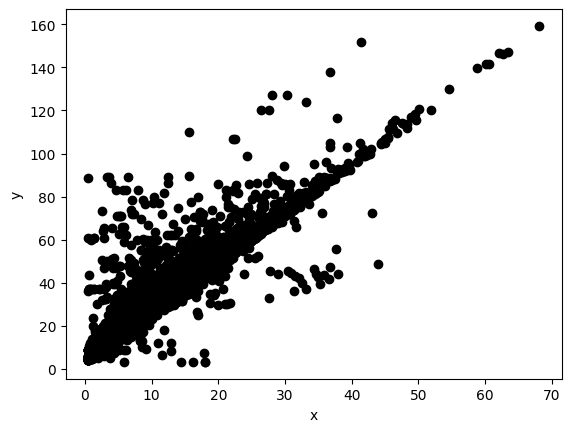

In [70]:
#visualizing it
plt.scatter(x["TRIP_MILES"],y, color = "black") # y depends on x
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [51]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [52]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [55]:
regressor.predict([[14]])

array([36.92848429])

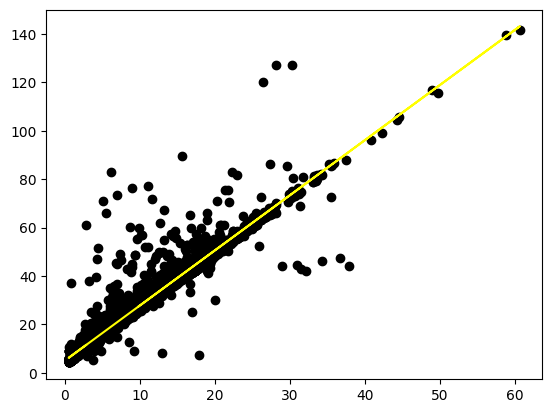

In [68]:
# plotting actual test data in black, predicted values (regression line) in yellow
plt.scatter(x_test, y_test, color='black')
plt.plot(x_test, regressor.predict(x_test), color='yellow')

In [72]:
#r2 score
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, regressor.predict(x_test))
print(r2_score)

0.9497058070457518
